# nbastat.csv에서 슛 시도 횟수 (FGA: x1), 3점슛 시도 횟수 (3PA: x2), 자유투시도 횟수 (FTA: x3)로부터 득점수 (PTS: y)를 예측하는 모델을 만들고 이 훈련시키시오.

## numpy

(248, 3)
(248, 1)
(3, 1)
Epoch 0, Loss: 22655.8
Epoch 100, Loss: 294.8166808144216
Epoch 200, Loss: 246.77057598989435
Epoch 300, Loss: 223.61530756288943
Epoch 400, Loss: 204.1659757429515
Epoch 500, Loss: 187.81233895614847
Epoch 600, Loss: 174.05795901075797
Epoch 700, Loss: 162.48615097846874
Epoch 800, Loss: 152.74715404032847
Epoch 900, Loss: 144.54737833937054
Weights (W): [1.08497114 0.11429379 0.51987244]
Bias (b): 0
Final Mean Squared Error (MSE): 1.1100030627322224


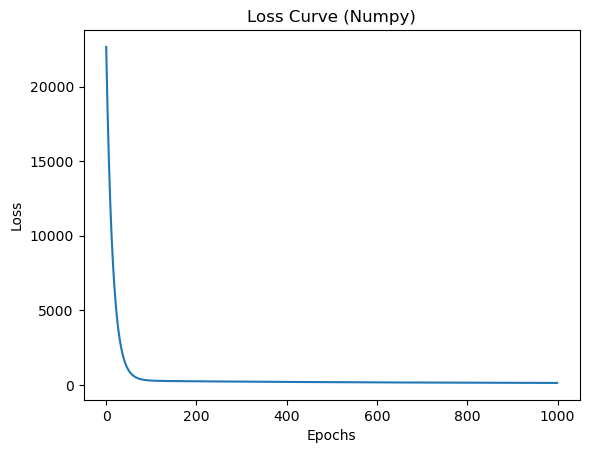

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_path = "nbastat2022.csv"
data = pd.read_csv(file_path)

# 변수 - x1: FGA, x2: 3PA, x3: FTA, y: PTS
# 필요한 열 선택 및 전처리
features = ['FGA', '3PA', 'FTA']
target = 'PTS'
data = data[features + [target]]

# 입력(X)와 출력(y) 분리
X = data[features].values   # (248 x 3)
y = data[target].values.reshape(-1, 1) # (248 x 1)

'''
# 데이터 정규화 (선택 사항)
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std
'''

# 학습 파라미터 초기화
n_samples, n_features = X.shape
W = np.zeros((n_features, 1))  # 가중치 초기화 (3 x 1)
b = 0                          # 절편 초기화
learning_rate = 1e-6           # 학습률
epochs = 1000                 # 반복 횟수

# 손실 값을 저장할 리스트
loss_arr = []

print(X.shape) 
print(y.shape)
print(W.shape)

# 선형 회귀 학습 (Gradient Descent)
for t in range(epochs):
    # 예측값 계산: X의 차원 (248x3), W의 차원(3x1) --> (248x1)
    #y_hat = np.dot(X, W) + b
    y_hat = np.matmul(X, W) + b

    # loss 계산: y_hat에서 y를 뺀 값을 제곱한 후에 다 더하고 0.5를 곱함
    #loss = np.mean((y_hat - y) ** 2)
    loss = 0.5*((y_hat - y)**2).sum()
    loss_arr.append(loss)  # 손실 값 저장
    
    # 경사하강법 적용 --> W의 미분(grad_w) --> grad_y_hat (248x1) * X (248x3)
    #dW = (2 / n_samples) * np.dot(X.T, (y_hat - y))
    #db = (2 / n_samples) * np.sum(y_hat - y)
    grad_y_hat = (y_hat - y)
    grad_w = np.matmul(np.transpose(X), grad_y_hat)
    
    # 파라미터 업데이트
    W -= learning_rate * grad_w
    #b -= learning_rate * db
    
    if t % 100 == 0:
        print(f"Epoch {t}, Loss: {loss}")

# 결과 출력
print("Weights (W):", W.flatten())
print("Bias (b):", b)

# 모델 평가: 예측값 계산 및 MSE(평균제곱오차) 출력 
y_test_hat = np.matmul(X, W) + b
mse = np.mean((y_test_hat - y) ** 2)
print("Final Mean Squared Error (MSE):", mse)

# 손실 그래프 그리기
plt.plot(loss_arr)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve (Numpy)")
plt.show()


## pytorch

Epoch 0, Loss: 178.94241333007812
Epoch 100, Loss: 136.4451904296875
Epoch 200, Loss: 108.33125305175781
Epoch 300, Loss: 88.25390625
Epoch 400, Loss: 72.26114654541016
Epoch 500, Loss: 58.89756774902344
Epoch 600, Loss: 47.637821197509766
Epoch 700, Loss: 38.18073654174805
Epoch 800, Loss: 30.293495178222656
Epoch 900, Loss: 23.778263092041016
Epoch 1000, Loss: 18.45798110961914
Epoch 1100, Loss: 14.169779777526855
Epoch 1200, Loss: 10.762772560119629
Epoch 1300, Loss: 8.09791374206543
Epoch 1400, Loss: 6.0485124588012695
Epoch 1500, Loss: 4.500906944274902
Epoch 1600, Loss: 3.354825019836426
Epoch 1700, Loss: 2.523611545562744
Epoch 1800, Loss: 1.933958888053894
Epoch 1900, Loss: 1.5253350734710693
Epoch 2000, Loss: 1.2490488290786743
Epoch 2100, Loss: 1.0669852495193481
Epoch 2200, Loss: 0.9501764178276062
Epoch 2300, Loss: 0.8772730827331543
Epoch 2400, Loss: 0.8330427408218384
Epoch 2500, Loss: 0.8069692850112915
Epoch 2600, Loss: 0.7920337915420532
Epoch 2700, Loss: 0.78371822834

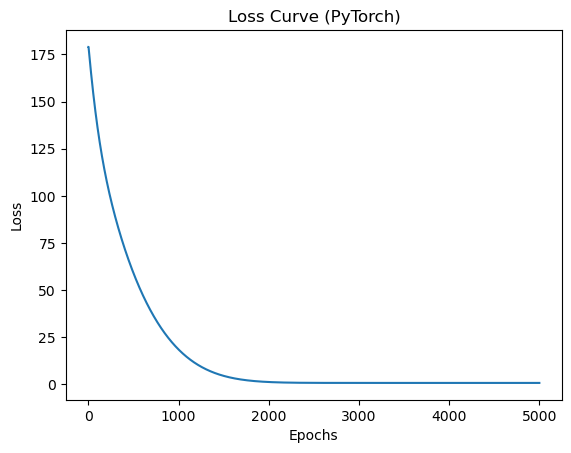

In [15]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_path = "nbastat2022.csv"
data = pd.read_csv(file_path)

# 필요한 열 선택 및 전처리
features = ['FGA', '3PA', 'FTA']
target = 'PTS'
data = data[features + [target]]

# 입력(X)와 출력(y) 분리 및 텐서 변환
X = torch.tensor(data[features].values, dtype=torch.float32)
y = torch.tensor(data[target].values.reshape(-1, 1), dtype=torch.float32)

# 데이터 정규화 (선택 사항)
X_mean, X_std = X.mean(dim=0), X.std(dim=0)
X = (X - X_mean) / X_std

# 선형 회귀 모델 클래스 정의
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(X.shape[1], 1)  # 입력 크기: 특성 개수, 출력 크기: 1

    def forward(self, x):
        y_hat = self.linear(x)
        return y_hat

model = LinearRegressionModel()

# loss 함수와 옵티마이저 정의
criterion = torch.nn.MSELoss()  # Mean Squared Error Loss 사용
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # SGD 옵티마이저 사용

# loss 값을 저장할 리스트
loss_arr = []

epochs = 5000   # 반복 횟수
for t in range(epochs):
    # 순전파: 예측값 계산
    y_hat = model(X)
    
    # loss 계산
    loss = criterion(y_hat, y)
    loss_arr.append(loss.item())  # loss 값 저장
    
    # 역전파 및 가중치 업데이트
    optimizer.step()
    optimizer.zero_grad()
    loss.backward()
    
    if t % 100 == 0:
        print(f"Epoch {t}, Loss: {loss.item()}")

# 결과 출력: 가중치와 절편 확인
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# 모델 평가: 예측값 계산 및 MSE(평균제곱오차) 출력
y_test_hat = model(X).detach().numpy()
mse = ((y_test_hat - y.numpy())**2).mean()
print("Final Mean Squared Error (MSE):", mse)

# loss 그래프 그리기
plt.plot(range(epochs), loss_arr)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve (PyTorch)")
plt.show()